# Continuous Control

---

In this notebook, you will see how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# This is how I set up in my local machine the Unity environment
#env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will see how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

This is a baseline, since it is how a random agent would behave.

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13199999704957008


# Train the DDPG Agent

### Create the Agent

You need to instantiate the Agent first with the appropriate parameters found above.

In [7]:
from ddpg_agent import Agents

agent = Agents(state_size=state_size, action_size=action_size, random_seed=1, n_agents=num_agents)

### Train the Agent 

This object is responsible for training the agent and composing the training process.

In [7]:
from trainer import Trainer

trainer = Trainer(env=env, agent=agent, brain_name=brain_name, n_agents=num_agents)

We compute two scores from the training process, the mean_scores which is the value of the mean scores for each episode. And the moving_avg_scores which is the value of the moving average of the last 100th episodes after each episode.

In [8]:
mean_scores, moving_avg_scores = trainer.train(print_every=1)

/home/pedro/UdacityDeepReinforcementLearning/p2_continuous-control/ddpg_agent.py:130: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode [1/1800]	Scores: 0.34	Moving Average: 0.34
Episode [2/1800]	Scores: 0.68	Moving Average: 0.51
Episode [3/1800]	Scores: 0.54	Moving Average: 0.52
Episode [4/1800]	Scores: 0.62	Moving Average: 0.54
Episode [5/1800]	Scores: 0.77	Moving Average: 0.59
Episode [6/1800]	Scores: 0.91	Moving Average: 0.64
Episode [7/1800]	Scores: 1.08	Moving Average: 0.70
Episode [8/1800]	Scores: 1.22	Moving Average: 0.77
Episode [9/1800]	Scores: 1.15	Moving Average: 0.81
Episode [10/1800]	Scores: 0.99	Moving Average: 0.83
Episode [11/1800]	Scores: 1.16	Moving Average: 0.86
Episode [12/1800]	Scores: 1.23	Moving Average: 0.89
Episode [13/1800]	Scores: 1.23	Moving Average: 0.92
Episode [14/1800]	Scores: 1.77	Moving Average: 0.98
Episode [15/1800]	Scores: 1.54	Moving Average: 1.02
Episode [16/1800]	Scores: 1.89	Moving Average: 1.07
Episode [17/1800]	Scores: 2.18	Moving Average: 1.14
Episode [18/1800]	Scores: 2.39	Moving Average: 1.21
Episode [19/1800]	Scores: 3.88	Moving Average: 1.35
Episode [20/1800]	Sco

### Plotting results

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Here we plot the values of mean_scores and moving_avg_scores over all episodes. They were 122 episodes in which the environment reached a moving average over 31.0 and is then considered solved.

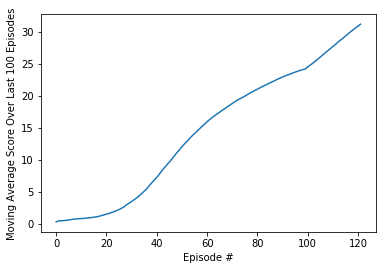

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(moving_avg_scores)), moving_avg_scores)
plt.ylabel('Moving Average Score Over Last 100 Episodes')
plt.xlabel('Episode #')
plt.show()

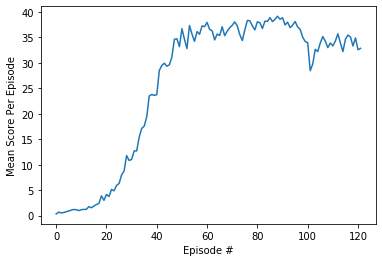

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(mean_scores)), mean_scores)
plt.ylabel('Mean Score Per Episode')
plt.xlabel('Episode #')
plt.show()

## Load Smart Agent and Watch it in Action

Finally we can see our agent in action by loading the parameters from the weigh files agent_actor.pth and agent_critic.pth

In [ ]:
import torch
#Load the agent into memory from the weight files
agent.actor_local.load_state_dict(torch.load('agent_actor.pth'))
agent.critic_local.load_state_dict(torch.load('agent_critic.pth'))
#Compute the mean scores for 100 episodes
max_t = 1000
n_episodes = 100
scores_mean = []                        # list containing scores from each episode
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)

    for _ in range(max_t):
        action = agent.act(states)

        env_info = env.step(action)[brain_name]

        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        
        states = next_states
        scores += rewards
        if np.any(dones):
            scores_mean.append(np.mean(scores)) 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_mean[-1]))
            break

When finished, you can close the environment.

In [ ]:
env.close()